# Week 8 handin

## 01 Assignment
this weeks assignment can be found here: 
https://github.com/Hartmannsolution/docker_notebooks/blob/master/notebooks/08-Exercise.ipynb


## 02 Status
Did it...(not the linear regression part)


## 03 Solution 

In [1]:
import requests
import pandas as pd

In [2]:
#Download the data
#Programatically download the data from the above link.
#Import the data into a Pandas dataframe.
#Show the head of the Pandas dataframe.
url = 'https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'
df = pd.read_csv(url, sep=",", encoding="utf-8")
df.head(1)

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236


In [3]:
#Reduce the dataset by:
#Make == Honda
#Fueltype == Gasoline
mask = (df['Identification.Make'] == 'Honda') & (df['Fuel Information.Fuel Type'] == 'Gasoline')
df = df[mask]

#Remove outliers. Hint: df[column name'] < df['column name'].quantile(0.90)


outlier_mask = (df['Fuel Information.Highway mpg'].astype(float) < df['Fuel Information.Highway mpg'].astype(float).quantile(0.90)) &\
               (df['Engine Information.Engine Statistics.Horsepower'].astype(float) < df['Engine Information.Engine Statistics.Horsepower'].astype(float).quantile(0.90))
outliers_df = df[outlier_mask].reset_index()
pd.set_option('display.max_rows', 10)
outliers_df

,index,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,102,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Automatic,21,Gasoline,31,Automatic transmission,2010 Honda Accord EX Coup AT,Honda,2010 Honda Accord Coupe,2010,190,162
1,103,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Manual,22,Gasoline,31,Manual transmission,2010 Honda Accord EX-L Coup,Honda,2010 Honda Accord Coupe,2010,190,162
2,104,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Automatic,21,Gasoline,31,Automatic transmission,2010 Honda Accord EX-L Coup AT,Honda,2010 Honda Accord Coupe,2010,190,162
3,106,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Manual,22,Gasoline,31,Manual transmission,2010 Honda Accord EX Coup,Honda,2010 Honda Accord Coupe,2010,190,162
4,107,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Automatic,21,Gasoline,31,Automatic transmission,2010 Honda Accord LX-S Coup AT,Honda,2010 Honda Accord Coupe,2010,190,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,5067,3,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot LX,Honda,2012 Honda Pilot,2012,250,253
135,5068,3,253,201,Four-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,17,Gasoline,24,Automatic transmission,2012 Honda Pilot LX 4WD,Honda,2012 Honda Pilot,2012,250,253
136,5069,3,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX,Honda,2012 Honda Pilot,2012,250,253
137,5070,3,253,201,Four-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,17,Gasoline,24,Automatic transmission,2012 Honda Pilot EX 4WD,Honda,2012 Honda Pilot,2012,250,253


In [9]:
#Only use 2 features: 'Fuel Information.Highway mpg' and 'Engine Information.Engine Statistics.Horsepower'
outliers_df = outliers_df[['Fuel Information.Highway mpg', 'Engine Information.Engine Statistics.Horsepower']]
outliers_df


,Fuel Information.Highway mpg,Engine Information.Engine Statistics.Horsepower
0,31,190
1,31,190
2,31,190
3,31,190
4,31,190
...,...,...
134,25,250
135,24,250
136,25,250
137,24,250


In [10]:
#Normalize data (reduce values to be between 0 and 1)
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
names = df.columns
d = scaler.fit_transform(outliers_df)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df

,Fuel Information.Highway mpg,Engine Information.Engine Statistics.Horsepower
0,0.733333,0.548872
1,0.733333,0.548872
2,0.733333,0.548872
3,0.733333,0.548872
4,0.733333,0.548872
...,...,...
134,0.333333,1.000000
135,0.266667,1.000000
136,0.333333,1.000000
137,0.266667,1.000000


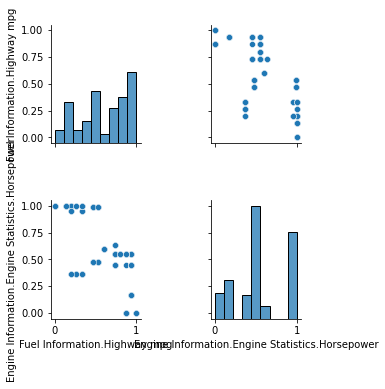

In [12]:
#Linear regression
#Perform linear regression where x = horsepower and y = mpg
#What is the coefficient (slope) of your model? What does this number mean?
#According to your model, what is y when x=1.
#Show the regression line on a scatterplot with the other datapoints.
import seaborn as sb
sb.pairplot(scaled_df)

In [7]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
import numpy as np

In [21]:
x = scaled_df['Engine Information.Engine Statistics.Horsepower'].astype(float)
y = scaled_df['Fuel Information.Highway mpg'].astype(float)
x_reshape = np.array(x).reshape(-1, 1)


In [17]:
model = sklearn.linear_model.LinearRegression()
model.fit(x_reshape, y)

LinearRegression()

In [19]:
model.coef_

array([-0.68515772])

In [20]:
model.intercept_


0.9776990886223593

In [24]:
predicted = model.predict(x_reshape)
yx = model.predict([[1]])
print(yx)
predicted

[0.29254137]


array([0.60163508, 0.60163508, 0.60163508, 0.60163508, 0.60163508,
       0.60163508, 0.60163508, 0.60163508, 0.60163508, 0.60163508,
       0.60163508, 0.66860538, 0.66860538, 0.66860538, 0.66860538,
       0.60163508, 0.60163508, 0.60163508, 0.60163508, 0.66860538,
       0.66860538, 0.66860538, 0.66860538, 0.60163508, 0.60163508,
       0.60163508, 0.85921317, 0.85921317, 0.85921317, 0.56557415,
       0.85921317, 0.85921317, 0.85921317, 0.85921317, 0.56557415,
       0.85921317, 0.85921317, 0.85921317, 0.85921317, 0.85921317,
       0.85921317, 0.56557415, 0.85921317, 0.85921317, 0.85921317,
       0.85921317, 0.85921317, 0.56557415, 0.97769909, 0.97769909,
       0.97769909, 0.97769909, 0.97769909, 0.97769909, 0.97769909,
       0.97769909, 0.6531507 , 0.6531507 , 0.6531507 , 0.6531507 ,
       0.6531507 , 0.6531507 , 0.6531507 , 0.6531507 , 0.6531507 ,
       0.6531507 , 0.6531507 , 0.6531507 , 0.6531507 , 0.6531507 ,
       0.72527256, 0.72527256, 0.72527256, 0.72527256, 0.72527

-0.6851577160316038 0.9776990886223594


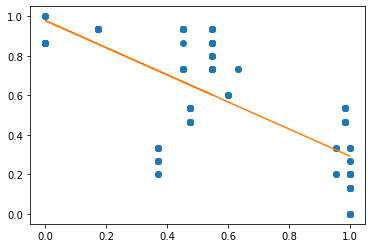

In [26]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
print(m, b)
plt.plot(x, m*x + b)